/opt/homebrew/Caskroom/miniconda/base/envs/ml/lib/python3.11/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


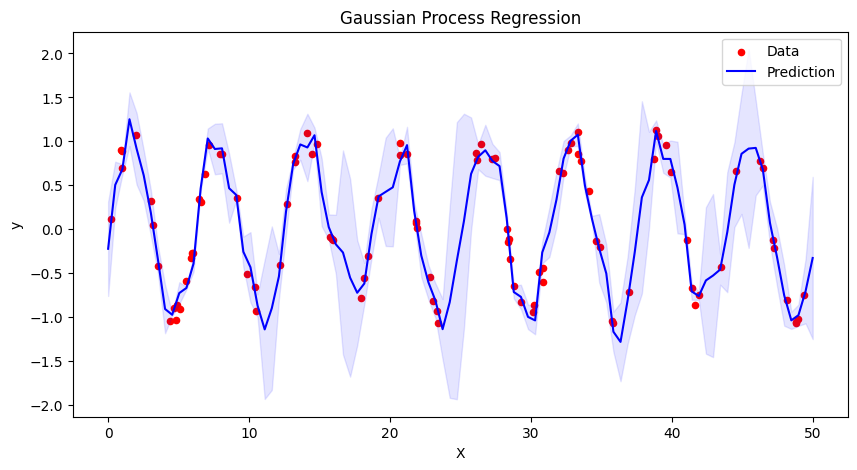

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ExpSineSquared, RBF
from skopt import BayesSearchCV
from skopt.space import Real

X_max = 50
N = 100
M = 100

# Generate some sample data
np.random.seed(0)
X = np.sort(X_max * np.random.rand(N, 1), axis=0)
y = np.sin(X).ravel()

# Add noise to targets
y += 0.1 * np.random.randn(N)

# Define the kernel for the Gaussian Process
kernel = ExpSineSquared() * RBF()

# Create a Gaussian Process regressor
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Define the search space for hyperparameters
param_space = {
    "kernel__k1__length_scale": Real(0.1, 10.0),
    "kernel__k1__periodicity": Real(0.1, 10.0),
    "kernel__k2__length_scale": Real(0.1, 10.0)
}

# Perform Bayesian hyperparameter search
gp = BayesSearchCV(gp, param_space, n_iter=20, cv=5, scoring='neg_mean_squared_error')
gp.fit(X, y)

# Get the best hyperparameters
best_params = gp.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the best model
gp = gp.best_estimator_

# Make predictions
x_pred = np.atleast_2d(np.linspace(0, X_max, M)).T
y_pred, sigma = gp.predict(x_pred, return_std=True)

# Plot the results
plt.figure(figsize=(10, 5))
plt.scatter(X, y, c='r', s=20, label='Data')
plt.plot(x_pred, y_pred, 'b-', label='Prediction')
plt.fill_between(x_pred.ravel(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.1, color='b')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Gaussian Process Regression')
plt.legend()
plt.show()
